In [71]:
#Importar los recursos requeridos
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt 

# Estimators
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [104]:
 #Importar la data preparada
raw_data = pd.read_csv('Credit_Prep.csv')

In [105]:
#Validar las columnas
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT2,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,3102,689,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1725,2682,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14027,13559,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,48233,49291,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,5670,35835,19131,2000,36681,10000,9000,689,679,0


In [106]:
#Examinar los Datos 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                

In [107]:
#Feature Selection
features = raw_data.iloc[:, 12:23]
print('Summary of features sample')
features.head

Summary of features sample


<bound method NDFrame.head of        BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0           3913       3102        689          0         0       689   
1           2682       1725       2682       3261         0      1000   
2          29239      14027      13559      15549      1518      1500   
3          46990      48233      49291      29547      2000      2019   
4           8617       5670      35835      19131      2000     36681   
...          ...        ...        ...        ...       ...       ...   
29995     188948     192815     208365      15980      8500     20000   
29996       1683       1828       3502          0      1837      3526   
29997       3565       3356       2758      19357         0         0   
29998      -1645      78379      76304      48944     85900      3409   
29999      47929      48905      49764      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0  

In [108]:
#dependent variable
depVar = raw_data['PAY_AMT6']

In [109]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,3913,3102,689,0,0,689,0,0,0,0,1
1,2682,1725,2682,3261,0,1000,1000,1000,0,2000,1
2,29239,14027,13559,15549,1518,1500,1000,1000,1000,5000,0
3,46990,48233,49291,29547,2000,2019,1200,1100,1069,1000,0
4,8617,5670,35835,19131,2000,36681,10000,9000,689,679,0


In [110]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [111]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29900      16809          0          0          0         0         0   
29901      50845      48750     103486      49387         0      6556   
29902      10392     168088     168955     124746    168096      6409   
29903      27378      17082      13333     172104     10018     13333   
29904      54952      56021      54126      59728      2600      4553   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29900         0         0         0         0                           1  
29901      3250      1563      1208       781                           0  
29902      7335      4448      4519      5003                           0  
29903        99        99    172104     30013                           0  
29904      5800      2000      1000      1462                           1  


In [112]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [113]:
#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [114]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [116]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [117]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [118]:
#Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
#SVN 
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [120]:
# Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
# Validar los rendimientos del modelo RF
print(cross_val_score(modelRF, X_train, y_train)) 

[0.9984656  0.94848704 0.65795837 0.39705738 0.99232675]


In [122]:
# Validar SVR
print(cross_val_score(modelSVR, X_train, y_train))

[-0.08551762 -0.07378432 -0.05989011 -0.01431229 -0.09297312]


In [123]:
#Validar LR
print(cross_val_score(modelLR, X_train, y_train))

[1. 1. 1. 1. 1.]


In [124]:
# Validar el score del modelo que nos dió mejor rendimiento
modelRF.score(X_train,y_train)

0.9346904744624273

In [125]:
modelSVR.score(X_train,y_train)

-0.022472489111534877

In [126]:
modelLR.score(X_train,y_train)

1.0

In [127]:
#Model Fitting RF
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.99841927 0.96940853 0.6705688  0.38146565 0.99636177]


0.9451082652134163

In [128]:
#Model Fit SVR
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.08551762 -0.07378432 -0.05989011 -0.01431229 -0.09297312]


-0.022472489111534877

In [129]:
#ModelFit LR
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [130]:
predictions = modelRF.predict(X_test)
#print(predictions)

In [131]:
#Obtener RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

3045.806734062528


In [132]:
predRsquared = r2_score(y_test,predictions)
print(predRsquared)

0.9462386033378193


In [133]:
#Make Predictions on Test Data
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.946
RMSE: 3045.807


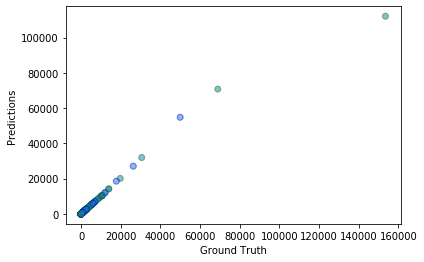

In [134]:
plt.scatter(y_test, predictions, edgecolors=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();